In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
df = pd.read_csv('Data/KaggleV2-May-2016.csv')

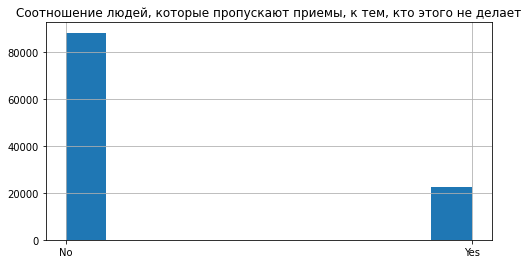

In [10]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [11]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [12]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [13]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [14]:
import logging

In [15]:
import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


In [16]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

In [17]:
logging.FileHandler('log_file.log')

<FileHandler d:\Data Science\IDE\EDA_6_Проектирование экспериментов\log_file.log (NOTSET)>

In [18]:
logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", level=logging.DEBUG)
logging.info('Проверка')

In [19]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [20]:
!mkdir logs

In [21]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

In [22]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


In [29]:
!pip install comet_ml

     -------------------------------------- 372.4/372.4 KB 2.3 MB/s eta 0:00:00

You should consider upgrading via the 'C:\Users\evgen\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 148.0/148.0 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 54.3/54.3 KB ? eta 0:00:00
     ---------------------------------------- 54.3/54.3 KB ? eta 0:00:00
     -------------------------------------- 467.2/467.2 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for nvidia-ml-py3, since package 'wheel' is not installed.
Using legacy 'setup.py install' for configobj, since package 'wheel' is not installed.
  Running setup.py install for nvidia-ml-py3: started
  Running setup.py install for nvidia-ml-py3: finished with status 'done'
  Running setup.py install for configobj: started
  Running setup.py install for configobj: finished with status 'done'


In [30]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="LP1SqU2ZG3WkopfvYAmDHIVvq",
    project_name="medical-appointment",
    workspace="sphinxscorp",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/sphinxscorp/medical-appointment/94b1912b72324c23849b9b0ebd2469f3



In [31]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sphinxscorp/medical-appointment/94b1912b72324c23849b9b0ebd2469f3
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (169.00 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10